In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('orders.csv')
data.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [3]:
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.strftime('%Y-%m')
df.head()

,order_id,date,time,year_month
0,1,2015-01-01,11:38:36,2015-01
1,2,2015-01-01,11:57:40,2015-01
2,3,2015-01-01,12:12:28,2015-01
3,4,2015-01-01,12:16:31,2015-01
4,5,2015-01-01,12:21:30,2015-01


In [4]:
df['year_month'] = pd.to_datetime(df['year_month'])
print(df)

       order_id       date      time year_month
0             1 2015-01-01  11:38:36 2015-01-01
1             2 2015-01-01  11:57:40 2015-01-01
2             3 2015-01-01  12:12:28 2015-01-01
3             4 2015-01-01  12:16:31 2015-01-01
4             5 2015-01-01  12:21:30 2015-01-01
...         ...        ...       ...        ...
21345     21346 2015-12-31  20:51:07 2015-12-01
21346     21347 2015-12-31  21:14:37 2015-12-01
21347     21348 2015-12-31  21:23:10 2015-12-01
21348     21349 2015-12-31  22:09:54 2015-12-01
21349     21350 2015-12-31  23:02:05 2015-12-01

[21350 rows x 4 columns]


In [5]:
df = pd.DataFrame(data)
df.set_index('year_month', inplace=True)

In [6]:
df.index

DatetimeIndex(['2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01',
               ...
               '2015-12-01', '2015-12-01', '2015-12-01', '2015-12-01',
               '2015-12-01', '2015-12-01', '2015-12-01', '2015-12-01',
               '2015-12-01', '2015-12-01'],
              dtype='datetime64[ns]', name='year_month', length=21350, freq=None)

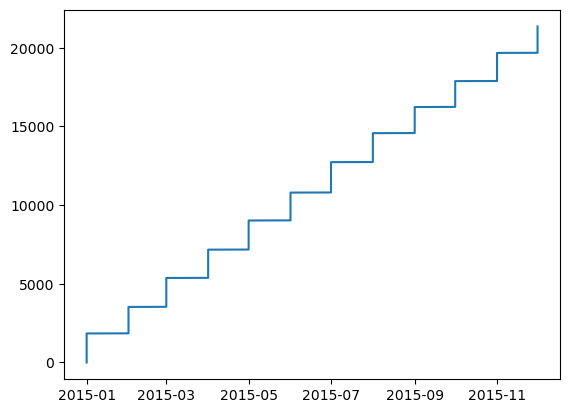

In [7]:
plt.plot(df.index,df['order_id'])

In [8]:
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

In [9]:
df.index

DatetimeIndex(['2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01',
               ...
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=21350, freq=None)

In [10]:
df_monthly = df.resample('M').sum()
df_monthly.head()

C:\Users\Muzilatul\AppData\Local\Temp\ipykernel_4204\3987527373.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').sum()


,order_id
date,
2015-01-31,1702935
2015-02-28,4529280
2015-03-31,8188920
2015-04-30,11279730
2015-05-31,15001888


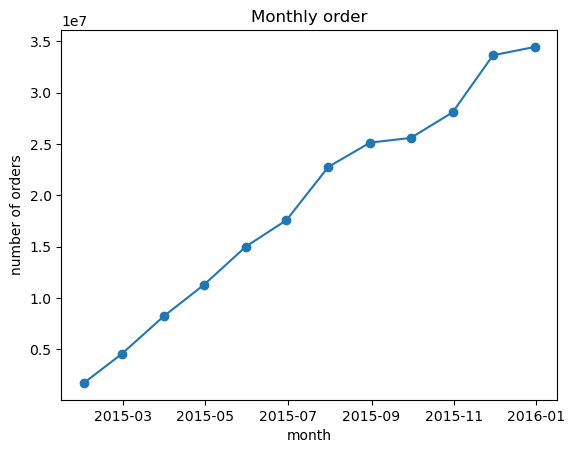

In [11]:
plt.plot(df_monthly.index, df_monthly['order_id'], marker='o')

plt.title('Monthly order')
plt.xlabel('month')
plt.ylabel('number of orders')
plt.show()

The month with the highest number of orders is December.

In [12]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.strftime('%H')
df.head()

,order_id,time,year_month,hour
date,,,,
2015-01-01,1,2023-09-15 11:38:36,2015-01-01,11
2015-01-01,2,2023-09-15 11:57:40,2015-01-01,11
2015-01-01,3,2023-09-15 12:12:28,2015-01-01,12
2015-01-01,4,2023-09-15 12:16:31,2015-01-01,12
2015-01-01,5,2023-09-15 12:21:30,2015-01-01,12


In [13]:
grouped = df.groupby(['hour'])['order_id'].count().reset_index()
print(grouped)

   hour  order_id
0    09         1
1    10         8
2    11      1231
3    12      2520
4    13      2455
5    14      1472
6    15      1468
7    16      1920
8    17      2336
9    18      2399
10   19      2009
11   20      1642
12   21      1198
13   22       663
14   23        28


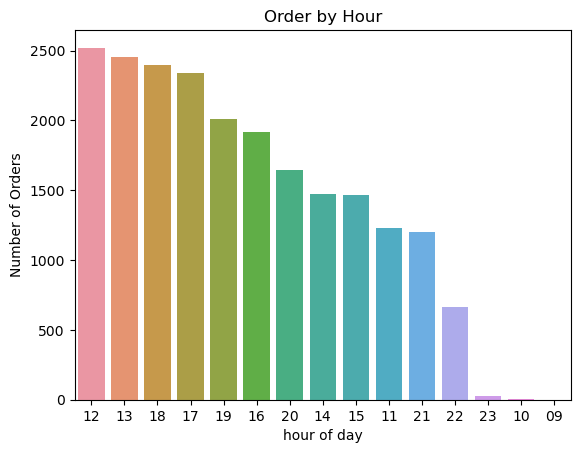

In [14]:
grouped = grouped.sort_values(by='order_id', ascending=False)

sns.barplot(x='hour', y='order_id', data=grouped)
plt.title('Order by Hour')
plt.xlabel('hour of day')
plt.ylabel('Number of Orders')
plt.show()

In the chart above, it can be seen that the busiest hour is 12 o'clock.

In [15]:
tabel1 = pd.read_csv('order_details.csv')
tabel2 = pd.read_csv('pizzas.csv')

merge = pd.merge(tabel1, tabel2, on='pizza_id', how='inner')  

merge.to_csv('merge.csv', index=False) 
print(merge)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                   179        77     hawaiian_m         1      hawaiian    M   
2                   357       146     hawaiian_m         1      hawaiian    M   
3                   389       163     hawaiian_m         1      hawaiian    M   
4                   568       247     hawaiian_m         1      hawaiian    M   
...                 ...       ...            ...       ...           ...  ...   
48615             39733     17492  the_greek_xxl         1     the_greek  XXL   
48616             41183     18139  the_greek_xxl         1     the_greek  XXL   
48617             42718     18789  the_greek_xxl         1     the_greek  XXL   
48618             43041     18919  the_greek_xxl         1     the_greek  XXL   
48619             47490     20866  the_greek_xxl         1     the_greek  XXL   

       price  
0      13.25

In [16]:
merge_grouped= merge.groupby(['pizza_type_id'])['quantity'].sum().reset_index()
merge_grouped.head()

,pizza_type_id,quantity
0,bbq_ckn,2432
1,big_meat,1914
2,brie_carre,490
3,calabrese,937
4,cali_ckn,2370


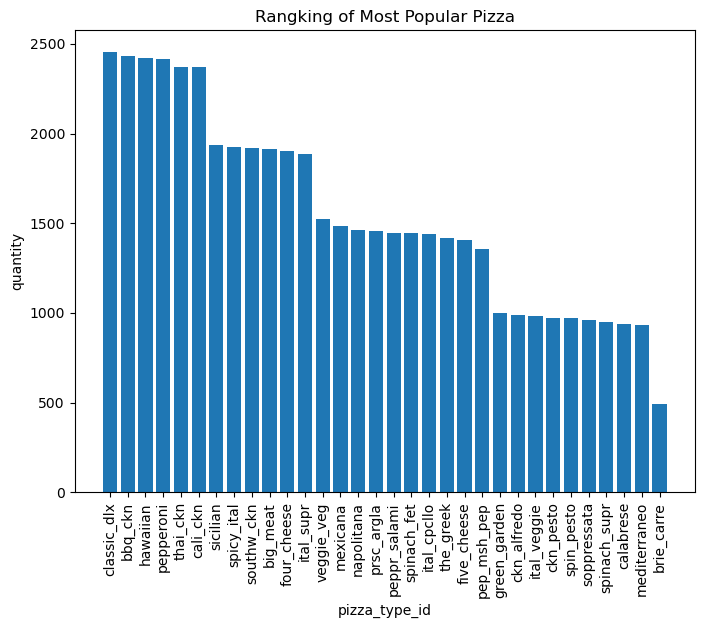

In [17]:
merge_grouped = merge_grouped.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(8, 6))

plt.bar(merge_grouped['pizza_type_id'], merge_grouped['quantity'])
plt.xlabel('pizza_type_id')
plt.ylabel('quantity')
plt.title('Rangking of Most Popular Pizza')
plt.xticks(rotation=90)
plt.show()

Based on the chart above, it shows that "Classic DLX" is the most commonly sold type of pizza.

In [18]:
merge['total'] = merge['quantity'] * merge['price']
print(merge)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                   179        77     hawaiian_m         1      hawaiian    M   
2                   357       146     hawaiian_m         1      hawaiian    M   
3                   389       163     hawaiian_m         1      hawaiian    M   
4                   568       247     hawaiian_m         1      hawaiian    M   
...                 ...       ...            ...       ...           ...  ...   
48615             39733     17492  the_greek_xxl         1     the_greek  XXL   
48616             41183     18139  the_greek_xxl         1     the_greek  XXL   
48617             42718     18789  the_greek_xxl         1     the_greek  XXL   
48618             43041     18919  the_greek_xxl         1     the_greek  XXL   
48619             47490     20866  the_greek_xxl         1     the_greek  XXL   

       price  total  
0    

In [19]:
merge_grouped= merge.groupby(['size'])['total'].sum().reset_index()
merge_grouped

,size,total
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


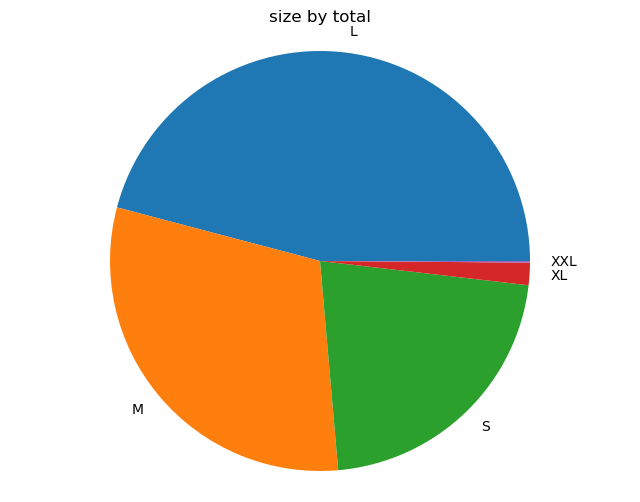

In [20]:
plt.figure(figsize=(8,6))
plt.pie(merge_grouped['total'], labels=merge_grouped['size'])
plt.title('size by total')
plt.axis('equal')
plt.show()

In [21]:
merge['total revenue'] = merge['quantity'] * merge['price']
print(merge)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                   179        77     hawaiian_m         1      hawaiian    M   
2                   357       146     hawaiian_m         1      hawaiian    M   
3                   389       163     hawaiian_m         1      hawaiian    M   
4                   568       247     hawaiian_m         1      hawaiian    M   
...                 ...       ...            ...       ...           ...  ...   
48615             39733     17492  the_greek_xxl         1     the_greek  XXL   
48616             41183     18139  the_greek_xxl         1     the_greek  XXL   
48617             42718     18789  the_greek_xxl         1     the_greek  XXL   
48618             43041     18919  the_greek_xxl         1     the_greek  XXL   
48619             47490     20866  the_greek_xxl         1     the_greek  XXL   

       price  total  total 

In [22]:
merge_grouped= merge.groupby(['pizza_type_id'])['total revenue'].count().reset_index()
merge_grouped.head()

,pizza_type_id,total revenue
0,bbq_ckn,2372
1,big_meat,1811
2,brie_carre,480
3,calabrese,927
4,cali_ckn,2302


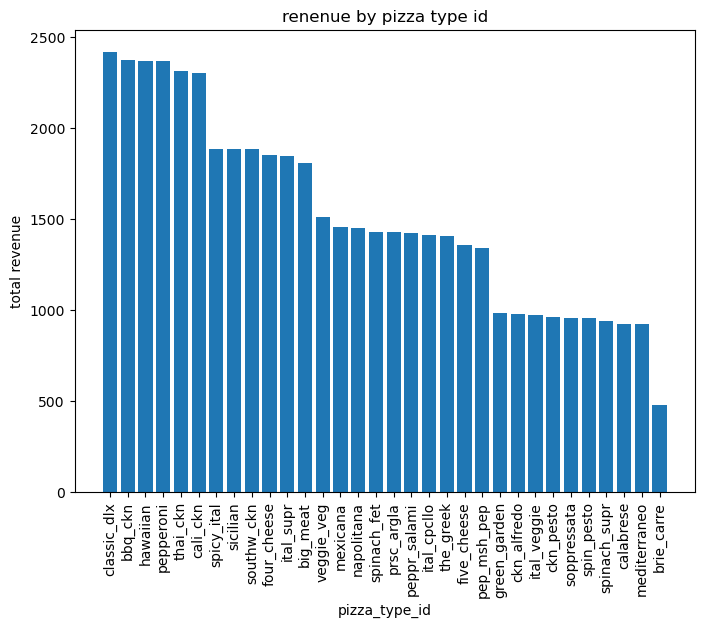

In [23]:
merge_grouped = merge_grouped.sort_values(by='total revenue', ascending=False)

plt.figure(figsize=(8, 6))

plt.bar(merge_grouped['pizza_type_id'], merge_grouped['total revenue'])
plt.xlabel('pizza_type_id')
plt.ylabel('total revenue')
plt.title('renenue by pizza type id')
plt.xticks(rotation=90)
plt.show()